## Řešení problému max. vážené splnitelnosti booleovské formule (MWSAT) pokročilou iterativní metodou

# Zadání

Problém řešte některou z pokročilých heuristik:

- simulované ochlazování
- genetický algoritmus

Heuristika musí zvádat instance rozdílných vlastností (zejména velikosti) bez interaktivních zásahů. Minimální rozsah velikosti je 20–50 pro nejméně kvalitní práce. Je třeba doložit práci heuristiky v celém stanoveném rozsahu (nikoliv pro jednu velikost někde v rozsahu).

Základní kód musí být vypracován samostatně. Jazyk je libovolný. Komponenty použité z jiných zdrojů (knihovny, moduly) musí být jasně citovány.

Po nasazení heuristiky ověřte její vlastnosti experimentálním vyhodnocením, které přesvědčivě doloží, jakou třídu (rozsah, velikosti…​) instancí heuristika zpracovává. Doporučujeme používat metriky nezávislé na platformě. Zejména v případě použití nestandardních, např. originálních technik doložte jejich účinnost experimentálně (což vyloučí případné diskuse o jejich vhodnosti).

Zpráva musí dokládat Váš racionální přístup k řešení problému, tedy celý pracovní postup. Ve zprávě je nutno popsat obě fáze nasazení heuristiky, jak nastavení, (white box fáze), tak závěrečné vyhodnocení heuristiky (black box fáze). Práce bez jasně oddělených těchto dvou fází bude pokládána za neúplnou. Protože zpráva dokládá Váš postup, prosím v popisu white box fáze uvádějte i neúspěšné pokusy, slepé uličky atd. V opačném případě vzniká podezření na volbu parametrů ad hoc. V popisu black box fáze uveďte, proč pokládáte výsledky za průkazné (alespoň úvahou).

Prosím používejte definované formáty pro instance a řešení, usnadníte tak lepší přizpůsobení zkušebních instancí.

Odkaz na kompletní zadání: https://courses.fit.cvut.cz/NI-KOP/homeworks/files/task2.html

# Heurestika
K řešení našeho problému jsem se rozhodl použít Simulované ochlazování. Nasazená heurestika bude řešit problém 3SAT.

## Relativní chyba

In [32]:
def Relative_Error(myData, Optimal_data):
    Lines_my_data = MyData.readlines()
    Lines_Optimal_data = Optimal_data.readlines()
    success = 0
    wrong = 0
    diff = 0
    prc = 0
    sumprc = 0
    wrongvalue = 0

    for line in Lines_my_data:
        InstanceName = line.split(" ")
        for optimal_line in Lines_Optimal_data:
            Optimal_Instance_Name = optimal_line.split(" ")
            #print(InstanceName[0][1:])
            #print(Optimal_Instance_Name[0])
            if InstanceName[0][1:] == Optimal_Instance_Name[0]:
                if InstanceName[1] == Optimal_Instance_Name[1]:
                    success = success + 1
                else:
                    #print(InstanceName[0][1:])
                    #print("--> value: " + str(InstanceName[1]) + "  Optimal Value: " + str(Optimal_Instance_Name[1]))
                    myvalue = int(InstanceName[1])
                    optValue = int(Optimal_Instance_Name[1])
                    diff = diff + abs(myvalue- optValue)
                    newprc = diff / abs(optValue / 100)
                    wrong = wrong + 1
                    wrongvalue = wrongvalue + abs(optValue)
                    percentage = ((( abs(abs(optValue) - (abs(myvalue) )))/ (abs(optValue)) ) *100 )
                    #print(str(percentage) + " " + str(myvalue) + " " + str(optValue))
                    prc = prc + percentage
                    sumprc = sumprc + newprc
                    #print(InstanceName[1])
                    #print(Optimal_Instance_Name[1])
                    #print("Percentage: " + str(percentage))
                    #print(str(int(InstanceName[0][1:]) - int(Optimal_Instance_Name[1])) )
                    #print(InstanceName[1] )
                    #print("========")
                break

    if wrong !=0:
        print("Success: "  + str(success))
        print("Optimal solution was not found: " + str(wrong))
        print("Success ratio: " + str(success /(success+wrong) ))
        #print ("Relative " + str(prc / (success + wrong)))
        #print("Relative error: " + str(prc/wrong))
        #print("NewRelative: " + str(prc))
    else:
        print("Success: "  + str(success))
        print("Success ratio: " + str(success /(success+wrong) ))




def timePrint(path):
    measured_data = pd.read_csv(path)
    Steps = measured_data["time"]
    cnt = 0
    sum = 0
    for i in Steps:
        cnt = cnt + 1
        sum = sum + i

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import display, HTML


## Cooling factor = 0.8

In [34]:
MyData = open("../Measurements-final/M/M200.800000.dat", "r")
Optimal_data = open("../../../wuf20-91R/wuf20-91R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 77
Optimal solution was not found: 23
Success ratio: 0.77


In [35]:
measured_data = pd.read_csv("../Measurements-final/M/timeM200.800000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

132.68


## Cooling factor = 0.90

In [36]:
MyData = open("../Measurements-final/M/M200.900000.dat", "r")
Optimal_data = open("../../../wuf20-91R/wuf20-91R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 87
Optimal solution was not found: 13
Success ratio: 0.87


In [37]:
measured_data = pd.read_csv("../Measurements-final/M/timeM200.900000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

254.94


## Cooling factor = 0.95

In [38]:
MyData = open("../Measurements-final/M/M200.950000.dat", "r")
Optimal_data = open("../../../wuf20-91R/wuf20-91R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 92
Optimal solution was not found: 8
Success ratio: 0.92


In [39]:
measured_data = pd.read_csv("../Measurements-final/M/timeM200.950000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

660.65


## Cooling factor  = 0.99

In [40]:
MyData = open("../Measurements-final/M/M200.990000.dat", "r")
Optimal_data = open("../../../wuf20-91R/wuf20-91R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 100
Success ratio: 1.0


In [41]:
measured_data = pd.read_csv("../Measurements-final/M/timeM200.990000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

2887.96


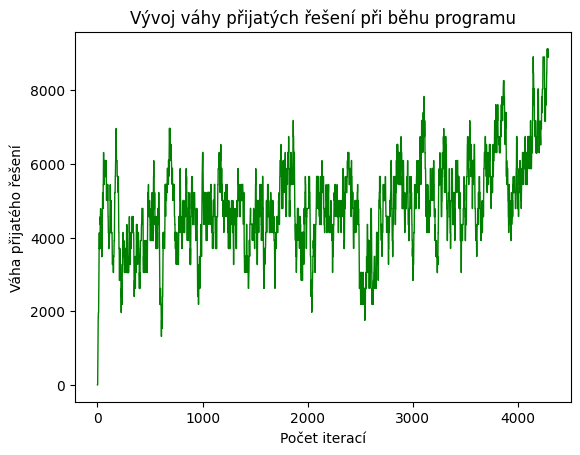

In [42]:
measured_data = pd.read_csv("../Measurements-final/Steps/wuf50-0844_steps_weight0.950000.csv")
Steps = measured_data["Steps"]
Conf_Weight = measured_data["Weight"]

plt.title('Vývoj váhy přijatých řešení při běhu programu')
plt.plot(Steps, Conf_Weight, color='green', linewidth = 1, markerfacecolor='blue')

plt.xlabel("Počet iterací")
plt.ylabel("Váha přijatého řešení")

#plt.savefig("../graphs/wuf20-043_Prubeh_95.png")

plt.show()

## Cooling factor  = 0.8 && wuf-50-218R

In [43]:
MyData = open("../Measurements-final/M/M500.800000.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 39
Optimal solution was not found: 61
Success ratio: 0.39


In [44]:
measured_data = pd.read_csv("../Measurements-final/M/timeM500.800000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

146.36


## Cooling factor  = 0.9 && wuf-50-218R

In [45]:
MyData = open("../Measurements-final/M/M500.900000.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 51
Optimal solution was not found: 49
Success ratio: 0.51


In [46]:
measured_data = pd.read_csv("../Measurements-final/M/timeM500.900000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

338.8


## Cooling factor  = 0.95 && wuf-50-218R

In [47]:
MyData = open("../Measurements-final/M/M500.950000.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 68
Optimal solution was not found: 32
Success ratio: 0.68


In [48]:
measured_data = pd.read_csv("../Measurements-final/M/timeM500.950000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

622.94


## Cooling factor  = 0.99 && wuf-50-218R

In [49]:
MyData = open("../Measurements-final/M/M500.990000.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 91
Optimal solution was not found: 9
Success ratio: 0.91


In [50]:
measured_data = pd.read_csv("../Measurements-final/M/timeM500.990000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

3419.68


## Cooling factor  = 0.9 && wuf-50-218R && Varianta B - InitT

In [51]:
MyData = open("../Measurements-final/M/M500.990000timeVarB.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 92
Optimal solution was not found: 8
Success ratio: 0.92


## Cooling factor  = 0.9 && wuf-50-218R && Varianta A - InitT

In [52]:
MyData = open("../Measurements-final/M/M500.990000eqA.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 98
Optimal solution was not found: 2
Success ratio: 0.98


In [53]:
measured_data = pd.read_csv("../Measurements-final/M/timeeqAM500.950000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

5105.72


## BestNeighbour

In [54]:

MyData = open("../Measurements-final/M/M500.990000BestN.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 57
Optimal solution was not found: 3
Success ratio: 0.95


In [55]:
MyData = open("../Measurements-final/M/M500.950000eqA.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 94
Optimal solution was not found: 6
Success ratio: 0.94


## RESET

In [56]:
MyData = open("../Measurements-final/M/M500.920000ResetBestN.dat", "r")
Optimal_data = open("../../../wuf50-218R/wuf50-218R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 6
Optimal solution was not found: 2
Success ratio: 0.75


In [57]:
measured_data = pd.read_csv("../Measurements-final/M/timeeqAM500.950000.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

5105.72


## 5ta iterace

In [58]:
MyData = open("../Measurements-final/M/M200.950000ResetBestN.dat", "r")
Optimal_data = open("../../../wuf20-91R/wuf20-91R-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

Success: 100
Success ratio: 1.0


In [59]:
measured_data = pd.read_csv("../Measurements-final/M/M200.950000ResetBestN.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

4273.04


In [60]:
measured_data = pd.read_csv("../Measurements/M/timeM200.800000Multiple.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

FileNotFoundError: [Errno 2] No such file or directory: '../Measurements/M/timeM200.800000Multiple.csv'

In [ ]:
measured_data = pd.read_csv("../Measurements-final/Steps/wuf50-0102_steps_weight0.920000Final_prubeh.csv")
Steps = measured_data["Steps"]
Conf_Weight = measured_data["Weight"]

plt.title('Vývoj váhy přijatých řešení při běhu programu')
plt.plot(Steps, Conf_Weight, color='green', linewidth = 1, markerfacecolor='blue')

plt.xlabel("Počet navštívených stavů")
plt.ylabel("Váha přijatého řešení")

plt.savefig("../graphs/wuf50_0102_prubeh_Visited_States.png")

plt.show()

## Black Box


# M

In [ ]:
MyData = open("../Measurements-final/M/M200.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf20-91/wuf20-91-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/M/M200.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)



# N

In [ ]:
MyData = open("../Measurements-final/N/N200.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf20-91/wuf20-91-N-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
#instance,Equilibrium,InitT,coolFactor,steps,time, succ
measured_data = pd.read_csv("../Measurements-final/N/N200.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)



# R

In [ ]:
MyData = open("../Measurements-final/R/R200.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf20-91/wuf20-91-R-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

# Q


In [ ]:
MyData = open("../Measurements-final/Q/Q200.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf20-91/wuf20-91-Q-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/Q/Q200.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

## 50 variables

## M

In [ ]:
MyData = open("../Measurements-final/M/M500.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf50-218/wuf50-218-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/M/M500.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

## N

In [ ]:
MyData = open("../Measurements-final/N/N500.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf50-218/wuf50-218-N-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/N/N500.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

## R

In [ ]:
MyData = open("../Measurements-final/R/R500.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf50-218/wuf50-218-R-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

  ## Q

In [ ]:
MyData = open("../Measurements-final/Q/Q500.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf50-218/wuf50-218-Q-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

## 75

In [ ]:
MyData = open("../Measurements-final/M/M750.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf75-325/wuf75-325-M-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/M/M750.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

In [ ]:
MyData = open("../Measurements-final/N/N750.950000BlackBox.dat", "r")
Optimal_data = open("../../../wuf75-325/wuf75-325-N-opt.dat", "r")
Relative_Error(MyData, Optimal_data)

In [ ]:
measured_data = pd.read_csv("../Measurements-final/N/N750.950000BlackBox.csv")
Steps = measured_data["time"]
cnt = 0
sum = 0
for i in Steps:
    cnt = cnt + 1
    sum = sum + i

print(sum/cnt)

In [ ]:
1